# Data Preparation

## Import and Settings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
import dask
import dask.dataframe as dd
import dask.array as da

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from joblib import dump

In [7]:
df = dd.read_csv('prepared_ds.csv')

## df_fast initialisieren (size = 0.01)

In [26]:
#df_big = df.compute()


In [8]:
df_fast = df.sample(frac=0.01, random_state = 1).compute()

In [9]:
df = df_fast

## trainieren (80, 20, random_state = 1)

In [28]:
train, test, train_lbl, test_lbl = train_test_split(df_fast.loc[:, ~df_fast.columns.isin(['Unnamed: 0', "Label"])], df_fast["Label"], test_size=0.2, random_state=1)

In [29]:
len(train)

5491621

In [30]:
len(test)

1372906

In [31]:
len(inputs)

686456

### M1

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
gamma = ['scale', 'auto']
degree = list(range(1, 15))
shrinking = [True, False]

In [ ]:
scores = []
for k, g, d, s in list(itertools.product(kernel, gamma, degree, shrinking)):
    try:
        clf = svm.SVC(kernel = k, gamma=g, degree=d, shrinking=s)
        clf.fit(train, train_lbl)
        score = clf.score(test, test_lbl)
    except:
        score = -1
    s = f"kernel: {k}, gamma: {g}, degree: {d}, shrinking: {s}"
    scores.append([score, s])

In [ ]:
scores.sort(reverse = True)
print(len(scores))
for score, string in scores[:10]:
    print(score, string)

In [33]:
model.score(test, test_lbl)

0.7928270398701732

In [22]:
test_lbl[:10]

29415      ddos
11716    Benign
50091    Benign
43680    Benign
6730     Benign
58087    Benign
4453     Benign
8106     Benign
57326      ddos
19235    Benign
Name: Label, dtype: object

In [23]:
#Was hat das Modell predicted?
model.predict(test[:10])

array(['ddos', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'ddos', 'Benign'], dtype='<U6')

### ... Model 2

## Accuracy

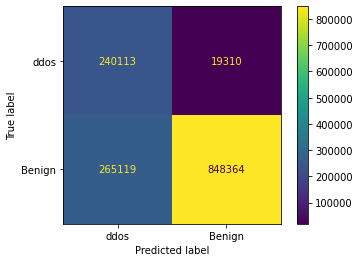

In [36]:
plot_confusion_matrix(model, test, test_lbl, labels=['ddos', 'Benign'])

## Modell speichern

In [ ]:
dump(clf, 'models/naive_bayes.joblib')